In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:

df = pd.read_csv('mushrooms.csv')
df.loc[1:, ['class', 'bruises', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root',
    'stalk-surface-above-ring','stalk-surface-below-ring', 'ring-type']]


,class,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type
1,e,t,c,b,k,c,s,s,p
2,e,t,c,b,n,c,s,s,p
3,p,t,c,n,n,e,s,s,p
4,e,f,w,b,k,e,s,s,e
5,e,t,c,b,n,c,s,s,p
...,...,...,...,...,...,...,...,...,...
8119,e,f,c,b,y,?,s,s,p
8120,e,f,c,b,y,?,s,s,p
8121,e,f,c,b,n,?,s,s,p
8122,p,f,c,n,b,?,s,k,e


In [3]:
df.shape

(8124, 23)

In [4]:
np.sum(df['class'] == 'p') / df.shape[0] # 48% poisonous

0.48202855736090594

In [5]:
class_nums = [df[df.columns].nunique()]
class_nums

[class                        2
 cap-shape                    6
 cap-surface                  4
 cap-color                   10
 bruises                      2
 odor                         9
 gill-attachment              2
 gill-spacing                 2
 gill-size                    2
 gill-color                  12
 stalk-shape                  2
 stalk-root                   5
 stalk-surface-above-ring     4
 stalk-surface-below-ring     4
 stalk-color-above-ring       9
 stalk-color-below-ring       9
 veil-type                    1
 veil-color                   4
 ring-number                  3
 ring-type                    5
 spore-print-color            9
 population                   6
 habitat                      7
 dtype: int64]

Mentsuk ki az eredeti df-et, nevezzuk at a hasznalt oszlopok ertekeit

#### Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [6]:
df['habitat'] = df['habitat'].replace({'g': 'grasses', 'l': 'leaves', 'm':'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'})
df['population'] = df['population'].replace({'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'})
df['cap-color'] = df['cap-color'].replace({'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'})
df['gill-color'] = df['gill-color'].replace({'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'})
df['class'] = df['class'].replace({'e': 'edible', 'p': 'poisonous'})
df['odor'] = df['odor'].replace({'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'})
# color_mapping = {
#     'k': 'black',
#     'n': 'brown',
#     'b': 'buff',
#     'h': 'chocolate',
#     'g': 'gray',
#     'r': 'green',
#     'o': 'orange',
#     'p': 'pink',
#     'u': 'purple',
#     'e': 'red',
#     'w': 'white',
#     'y': 'yellow'
# }

# # Assuming df is your DataFrame and 'gill-color' is your column
# df['gill-color'] = df['gill-color'].map(color_mapping)

df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,x,s,brown,t,pungent,f,c,n,black,...,s,w,w,p,w,o,p,k,scattered,urban
1,edible,x,s,yellow,t,almond,f,c,b,black,...,s,w,w,p,w,o,p,n,numerous,grasses
2,edible,b,s,white,t,anise,f,c,b,brown,...,s,w,w,p,w,o,p,n,numerous,meadows
3,poisonous,x,y,white,t,pungent,f,c,n,brown,...,s,w,w,p,w,o,p,k,scattered,urban
4,edible,x,s,gray,f,none,f,w,b,black,...,s,w,w,p,w,o,e,n,abundant,grasses


nincsenek nan ertekek, tiszta dataset

In [7]:
df.select_dtypes('object').nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

KERDES kell e droppolni a low and high valtozatos sorokat????

Text(0.5, 1.0, 'Habitat Distribution: Edible Vs Poisonous')

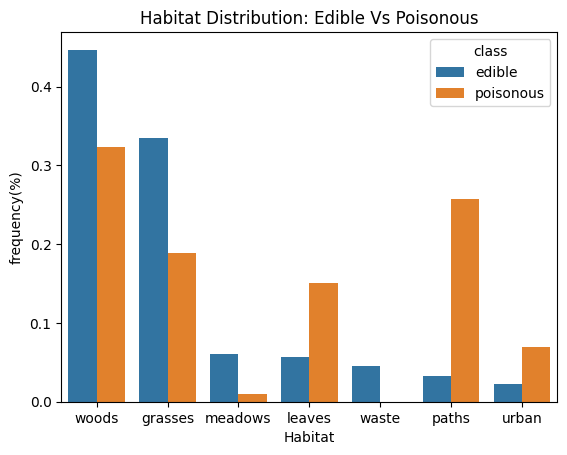

In [8]:
#Habitat Distribution
#habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

df_habitat = df['habitat'].groupby(df['class']).value_counts(normalize=True).rename('frequency').to_frame().reset_index()
sns.barplot(data = df_habitat,x='habitat',y='frequency',hue='class')
plt.xlabel('Habitat')
plt.ylabel('frequency(%)')
plt.title("Habitat Distribution: Edible Vs Poisonous")

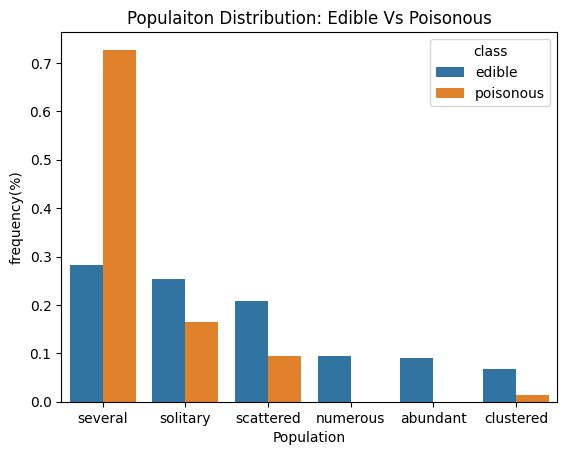

In [9]:
#population: Edible Vs Poisonous
#population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

df_popu = df['population'].groupby(df['class']).value_counts(normalize= True).rename('frequency').to_frame().reset_index()
sns.barplot(data = df_popu,x='population',y='frequency',hue='class')
plt.xlabel('Population')
plt.ylabel('frequency(%)')
plt.title("Populaiton Distribution: Edible Vs Poisonous");

In [10]:
#Define dictionary to replace the values ['n','o','t'] to [1 , 2 , Zero] to make it readable
ring_num = {
    'o': 1,
    't': 2,
    'n':0
}
df_ring = df['ring-number'].replace(ring_num).groupby(df['class']).value_counts(normalize= True).rename('frequency').to_frame().reset_index()


Text(0.5, 1.0, 'Ring Number Distribution: Edible Vs Poisonous')

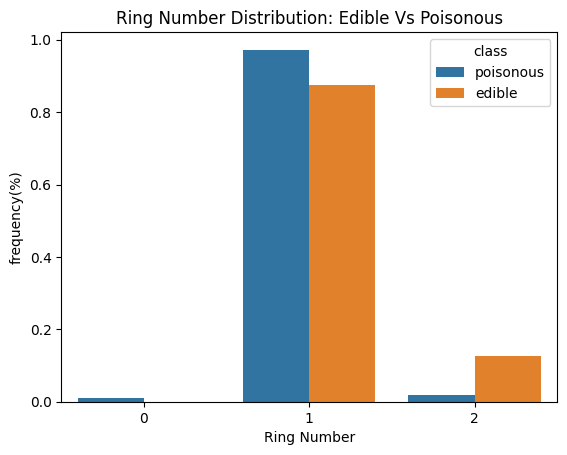

In [11]:
fig = sns.barplot(data= df_ring , x = 'ring-number' , y= 'frequency' , hue = 'class')
plt.xlabel('Ring Number')
plt.ylabel('frequency(%)')
plt.title("Ring Number Distribution: Edible Vs Poisonous")

Text(0.5, 1.0, 'Cap Color Distribution: Edible Vs Poisonous')

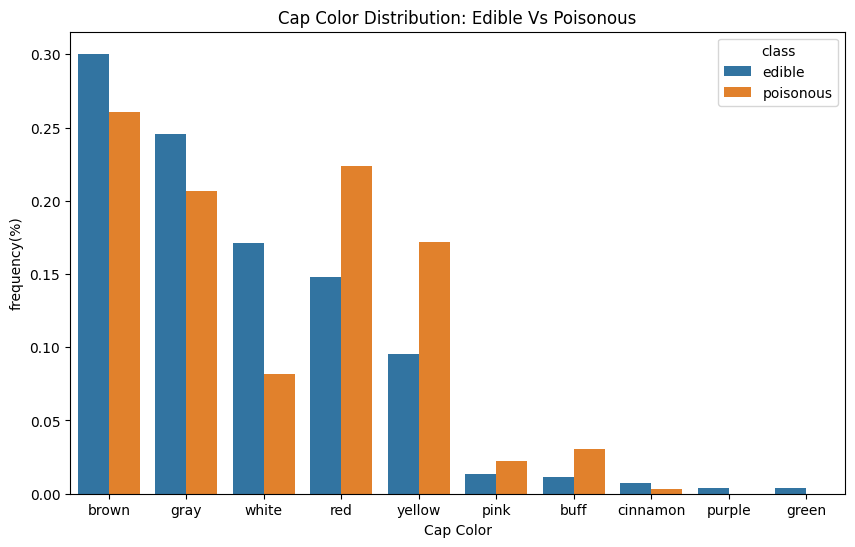

In [12]:
df_cap_color = df['cap-color'].groupby(df['class']).value_counts(normalize= True).rename('frequency').to_frame().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

sns.barplot(data = df_cap_color,x='cap-color',y='frequency',hue='class')
plt.xlabel('Cap Color')
plt.ylabel('frequency(%)')
plt.title("Cap Color Distribution: Edible Vs Poisonous")

Text(0.5, 1.0, 'Gill Color Distribution: Edible Vs Poisonous')

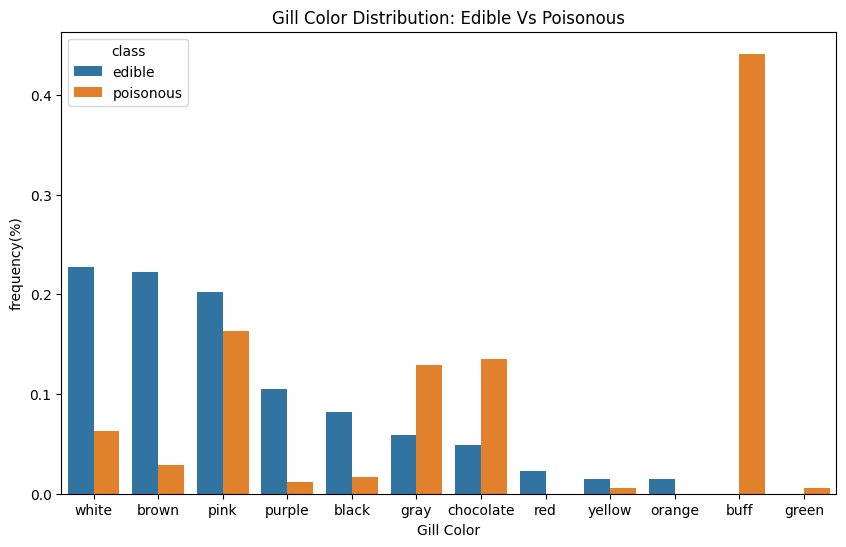

In [13]:
df_gill_color = df['gill-color'].groupby(df['class']).value_counts(normalize= True).rename('frequency').to_frame().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(data = df_gill_color,x='gill-color',y='frequency',hue='class')
plt.xlabel('Gill Color')
plt.ylabel('frequency(%)')
plt.title("Gill Color Distribution: Edible Vs Poisonous")

Text(0.5, 1.0, 'Distribution by Odor: Edible Vs Poisonous')

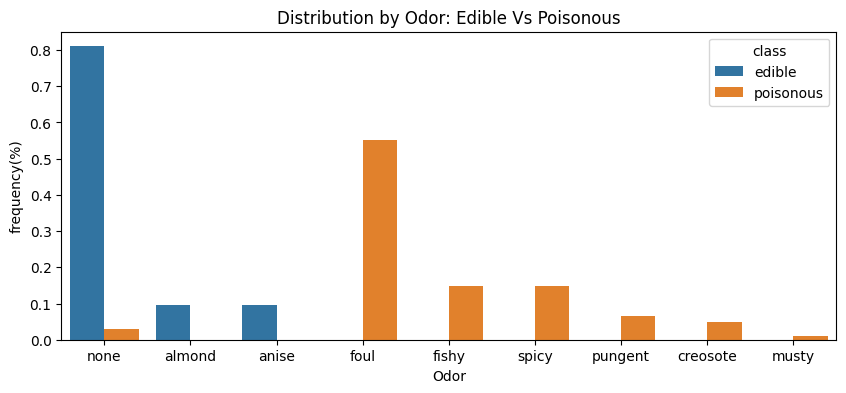

In [14]:
df_odor = df['odor'].groupby(df['class']).value_counts(normalize= True).rename('frequency').to_frame().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(data = df_odor,x='odor',y='frequency',hue='class')
plt.xlabel('Odor')
plt.ylabel('frequency(%)')
plt.title("Distribution by Odor: Edible Vs Poisonous")

# getting started with pre processing/ model building

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler #could be onehot encoder?
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier #could use tensorflow?

import joblib


In [16]:
data = pd.read_csv('mushrooms.csv')

In [17]:
def prepare_data(noise=0):
    data = pd.read_csv('mushrooms.csv')

    # encode dataframe
    mappings = list()
    encoder = LabelEncoder()

    for column in range(len(data.columns)):
        data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]]) #transform every column to numerical values
        mappings_dict = {index: label for index, label in enumerate(encoder.classes_)} #create dictionary for encoded and original values
        mappings.append(mappings_dict) #append dictionary to mappings list


    # Split data into features and target
    y = data['class']
    X = data.drop(['class'], axis=1)



    # set noise percentage
    noise_percentage = noise

    # Calculate the number of noisy data points
    num_noise_points = int(len(X) * (noise_percentage / 100))

    # Choose random indices to add noise
    noise_indices = np.random.choice(len(X), num_noise_points, replace=False)

    # Add noise to selected indices
    for column in X.columns:
        # Assuming your data is categorical with numerical values
        unique_values = X[column].unique()
        X.loc[noise_indices, column] = np.random.choice(unique_values, size=num_noise_points)

    return X, y

## set random noise

In [18]:
# noise_percentage = 20

# # Calculate the number of noisy data points
# num_noise_points = int(len(X) * (noise_percentage / 100))

# # Choose random indices to add noise
# noise_indices = np.random.choice(len(X), num_noise_points, replace=False)

# # Add noise to selected indices
# for column in X.columns:
#     # Assuming your data is categorical with numerical values
#     unique_values = X[column].unique()
#     X.loc[noise_indices, column] = np.random.choice(unique_values, size=num_noise_points)





## scale values

In [19]:
# scaler = StandardScaler()

# X = pd.DataFrame(scaler.fit_transform(X))

# X = X.iloc[:, :7]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection

In [20]:
log_reg = LogisticRegression()
svm = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
rf = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=5)
nn = MLPClassifier(hidden_layer_sizes=(32, 32), activation='relu', solver='adam')#set max iter etc.

log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
nn.fit(X_train, y_train)

print('Logistic Regression Score: ', log_reg.score(X_test, y_test))
print('----------------SVM Score: ', svm.score(X_test, y_test))
print('------Random Forest Score: ', rf.score(X_test, y_test))
print('-----Neural Network Score: ', nn.score(X_test, y_test))

NameError: name 'X_train' is not defined

# Grid search for random forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import accuracy_score

# # Assuming X is your feature matrix and y is your target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a Random Forest Classifier
# rf_classifier = RandomForestClassifier()

# # Define a parameter grid to search through
# param_grid = {
#     'n_estimators': [50, 100, 150],        # Number of trees in the forest
#     'max_depth': [10, 13, 15, 18, 20, 23],       # Maximum depth of the trees
#     'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4]           # Minimum number of samples required to be at a leaf node
# }

# # Use GridSearchCV to search through the parameter grid and find the best combination
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Train the model with the best hyperparameters
# best_rf_model = RandomForestClassifier(**best_params)
# best_rf_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = best_rf_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred_log_reg = log_reg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_nn = nn.predict(X_test)

# print('Logistic Regression Confusion Matrix: \n', confusion_matrix(y_test, y_pred_log_reg))
# print('----------------SVM Confusion Matrix: \n', confusion_matrix(y_test, y_pred_svm))
# print('-----Neural Network Confusion Matrix: \n', confusion_matrix(y_test, y_pred_nn))

print('Logistic Regression Classification Report: \n', classification_report(y_test, y_pred_log_reg))
print('----------------SVM Classification Report: \n', classification_report(y_test, y_pred_svm))
print('------Random Forest Classification Report: \n', classification_report(y_test, y_pred_rf))
print('-----Neural Network Classification Report: \n', classification_report(y_test, y_pred_nn))



Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.83      0.76       843
           1       0.77      0.61      0.68       782

    accuracy                           0.72      1625
   macro avg       0.73      0.72      0.72      1625
weighted avg       0.73      0.72      0.72      1625

----------------SVM Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       843
           1       0.82      0.70      0.76       782

    accuracy                           0.78      1625
   macro avg       0.79      0.78      0.78      1625
weighted avg       0.79      0.78      0.78      1625

------Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       843
           1       0.83      0.77      0.80       782

    accuracy                           0.81    

<Axes: >

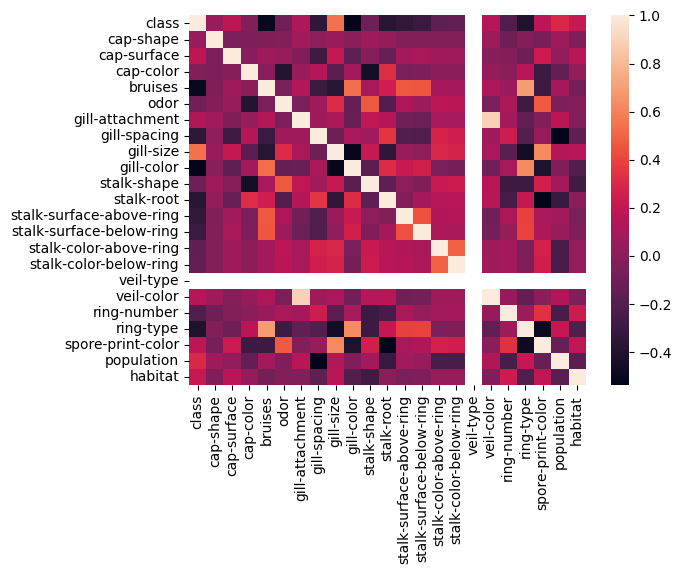

In [ ]:
corr = data.corr()
sns.heatmap(corr)

# finding best feattures

In [ ]:
from sklearn.feature_selection import RFECV

estimator = LogisticRegression()


selector = RFECV(estimator, cv=5)
selector = selector.fit(X, y)

# Print the optimal number of features
print("Optimal number of features: %d" % selector.n_features_)

# Print the selected features
print("Selected features: %s" % selector.support_)

Optimal number of features: 3
Selected features: [False  True False  True False False  True]


In [ ]:
print(X[X.columns[selector.support_]])

             1         3         6
0    -0.597701 -0.907056 -0.629759
1     0.235470  1.102468 -0.629759
2     0.235470  1.102468 -0.629759
3     1.068642  1.102468 -0.629759
4     0.235470 -0.907056  1.587909
...        ...       ...       ...
8119  0.235470 -0.907056 -0.629759
8120  0.235470 -0.907056 -0.629759
8121  0.235470 -0.907056 -0.629759
8122  1.068642 -0.907056 -0.629759
8123  0.235470 -0.907056 -0.629759

[8124 rows x 3 columns]


In [ ]:
ndata = X[X.columns[selector.support_]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ndata, y, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression()
svm = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
rf = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=5)
nn = MLPClassifier(hidden_layer_sizes=(16, 16), activation='relu', solver='adam')#set max iter etc.

In [ ]:
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
nn.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(16, 16))

In [ ]:
print('Logistic Regression Score: ', log_reg.score(X_test, y_test))
print('----------------SVM Score: ', svm.score(X_test, y_test))
print('------Random Forest Score: ', rf.score(X_test, y_test))
print('-----Neural Network Score: ', nn.score(X_test, y_test))


Logistic Regression Score:  0.712
----------------SVM Score:  0.7236923076923077
------Random Forest Score:  0.7304615384615385
-----Neural Network Score:  0.7304615384615385


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred_log_reg = log_reg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_nn = nn.predict(X_test)

print('Logistic Regression Confusion Matrix: \n', confusion_matrix(y_test, y_pred_log_reg))
print('----------------SVM Confusion Matrix: \n', confusion_matrix(y_test, y_pred_svm))
print('------Random Forest Confusion Matrix: \n', confusion_matrix(y_test, y_pred_rf))
print('-----Neural Network Confusion Matrix: \n', confusion_matrix(y_test, y_pred_nn))

print('Logistic Regression Classification Report: \n', classification_report(y_test, y_pred_log_reg, digits=10))
print('----------------SVM Classification Report: \n', classification_report(y_test, y_pred_svm, digits=10))
print('------Random Forest Classification Report: \n', classification_report(y_test, y_pred_rf, digits=10))
print('-----Neural Network Classification Report: \n', classification_report(y_test, y_pred_nn, digits=10))



Logistic Regression Confusion Matrix: 
 [[706 137]
 [331 451]]
----------------SVM Confusion Matrix: 
 [[630 213]
 [236 546]]
------Random Forest Confusion Matrix: 
 [[600 243]
 [195 587]]
-----Neural Network Confusion Matrix: 
 [[619 224]
 [214 568]]
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0  0.6808100289 0.8374851720 0.7510638298       843
           1  0.7670068027 0.5767263427 0.6583941606       782

    accuracy                      0.7120000000      1625
   macro avg  0.7239084158 0.7071057574 0.7047289952      1625
weighted avg  0.7222905687 0.7120000000 0.7064683336      1625

----------------SVM Classification Report: 
               precision    recall  f1-score   support

           0  0.7274826790 0.7473309609 0.7372732592       843
           1  0.7193675889 0.6982097187 0.7086307592       782

    accuracy                      0.7236923077      1625
   macro avg  0.7234251340 0.7227703398 0.7229520092 

# confusion matrix

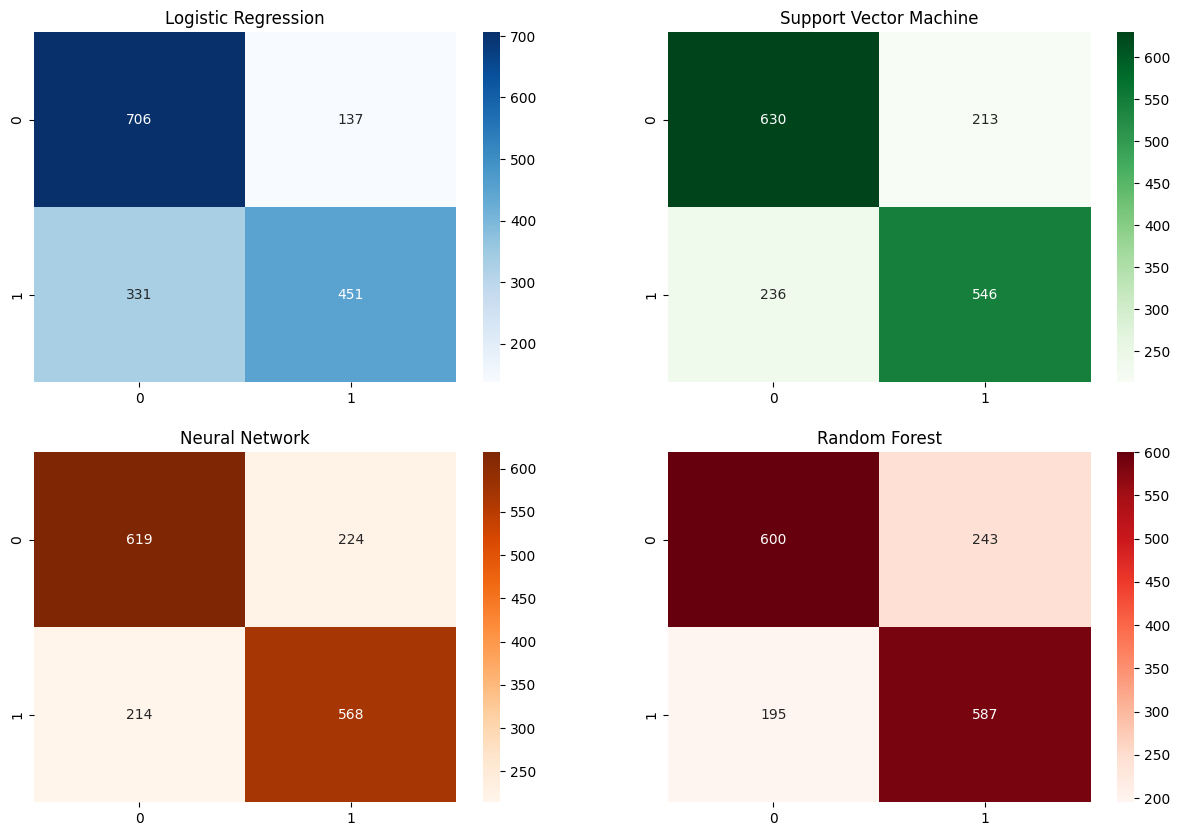

In [39]:
# Assuming you have predictions y_pred_rf for Random Forest
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')

# Confusion Matrix for SVM
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens', ax=axes[0, 1])
axes[0, 1].set_title('Support Vector Machine')

# Confusion Matrix for Neural Network
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='d', cmap='Grey', ax=axes[1, 0])
axes[1, 0].set_title('Neural Network')

# Confusion Matrix for Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Reds', ax=axes[1, 1])
axes[1, 1].set_title('Random Forest')

plt.show()


In [40]:
X, y = prepare_data(noise=0)

# min needed features

In [49]:
from sklearn.feature_selection import SelectKBest, f_classif
X_new = SelectKBest(f_classif, k=8)
X_new.set_output(transform='pandas')
X = X_new.fit_transform(X, y)
X_new.get_feature_names_out()

array(['bruises', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'ring-type'], dtype=object)

## Preparation

In [6]:
def prepare_data(noise=0):
    data = pd.read_csv('mushrooms.csv')
    # select features
    selected_columns = ['class', 'bruises', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root',
                    'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-type']

    # Select the desired columns from the DataFrame
    data = data.loc[:, selected_columns]
    # encode dataframe
    mappings = list()
    encoder = LabelEncoder()
    for column in range(len(data.columns)):
        data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]]) #transform every column to numerical values
        mappings_dict = {index: label for index, label in enumerate(encoder.classes_)} #create dictionary for encoded and original values
        mappings.append(mappings_dict) #append dictionary to mappings list


    # Split data into features and target
    y = data['class']
    X = data.drop(['class'], axis=1)

    

    # set noise percentage
    noise_percentage = noise

    # Calculate the number of noisy data points
    num_noise_points = int(len(X) * (noise_percentage / 100))

    # Choose random indices to add noise
    noise_indices = np.random.choice(len(X), num_noise_points, replace=False)

    # Add noise to selected indices
    for column in X.columns:
        # Assuming your data is categorical with numerical values
        unique_values = X[column].unique()
        X.loc[noise_indices, column] = np.random.choice(unique_values, size=num_noise_points)

    return X, y

## work

In [33]:
X, y = prepare_data(noise=10)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
log_reg = LogisticRegression()
svm = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
rf = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=5)
nn = MLPClassifier(hidden_layer_sizes=(32, 32), activation='relu', solver='adam')#set max iter etc.

log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
nn.fit(X_train, y_train)

joblib.dump(log_reg, 'logistic_regression_model.pkl')
joblib.dump(svm, 'svm_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(nn, 'neural_network_model.pkl')

print('Logistic Regression Score: ', log_reg.score(X_test, y_test))
print('----------------SVM Score: ', svm.score(X_test, y_test))
print('------Random Forest Score: ', rf.score(X_test, y_test))
print('-----Neural Network Score: ', nn.score(X_test, y_test))


y_pred_log_reg = log_reg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_nn = nn.predict(X_test)

C:\Users\darab\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\darab\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Logistic Regression Score:  0.8892307692307693
----------------SVM Score:  0.9458461538461539
------Random Forest Score:  0.9526153846153846
-----Neural Network Score:  0.947076923076923


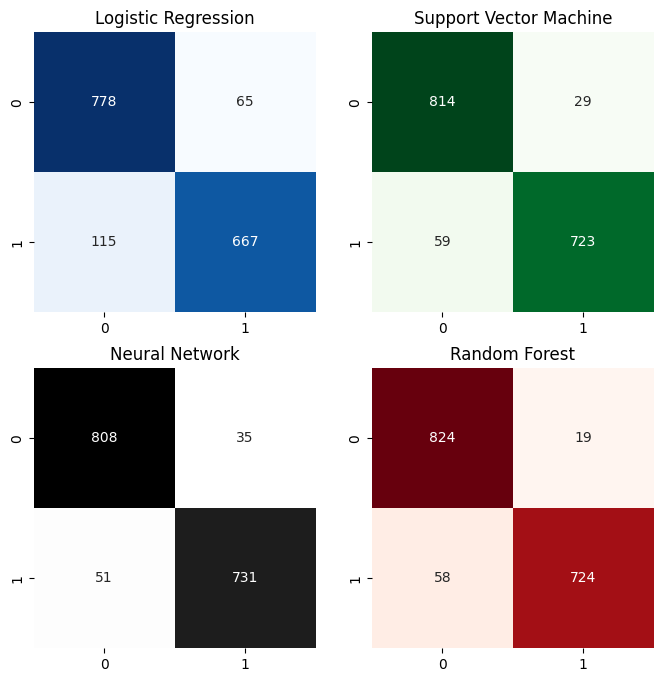

In [44]:
from sklearn.metrics import confusion_matrix

# Assuming you have predictions y_pred_rf for Random Forest
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], cbar=False)
axes[0, 0].set_title('Logistic Regression')

# Confusion Matrix for SVM
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens', ax=axes[0, 1], cbar=False)
axes[0, 1].set_title('Support Vector Machine')

# Confusion Matrix for Neural Network
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='d', cmap='Greys', ax=axes[1, 0], cbar=False)
axes[1, 0].set_title('Neural Network')

# Confusion Matrix for Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Reds', ax=axes[1, 1], cbar=False)
axes[1, 1].set_title('Random Forest')

plt.show()

In [30]:
pred = rf.predict(X_train.iloc[4:5])
pred

array([0])

In [31]:
X_train.iloc[4:5]

,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type
438,1,0,0,4,2,2,2,4


In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_log_reg = log_reg.predict(X_test)
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.9464751958224543
Recall: 0.9271099744245525
F1-Score: 0.9366925064599484


## auc roc curve

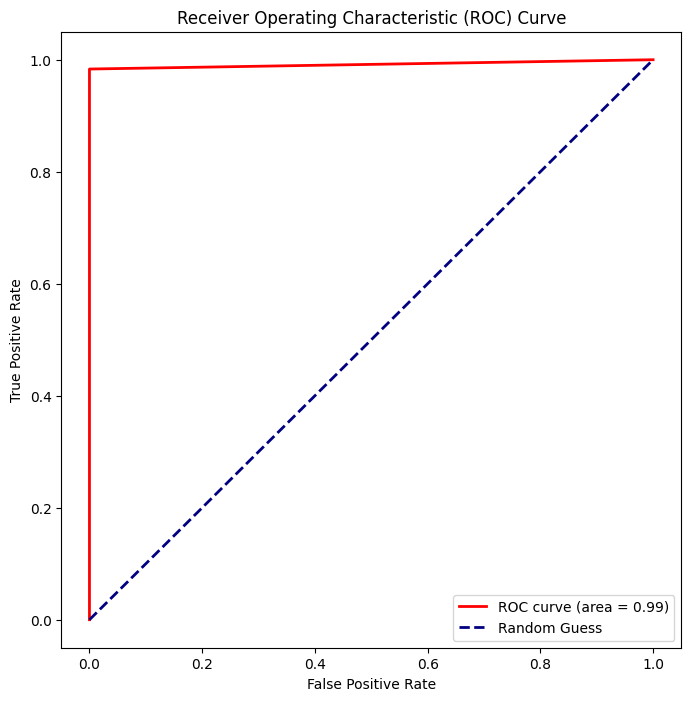

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have y_test and y_pred_rf
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<Axes: >

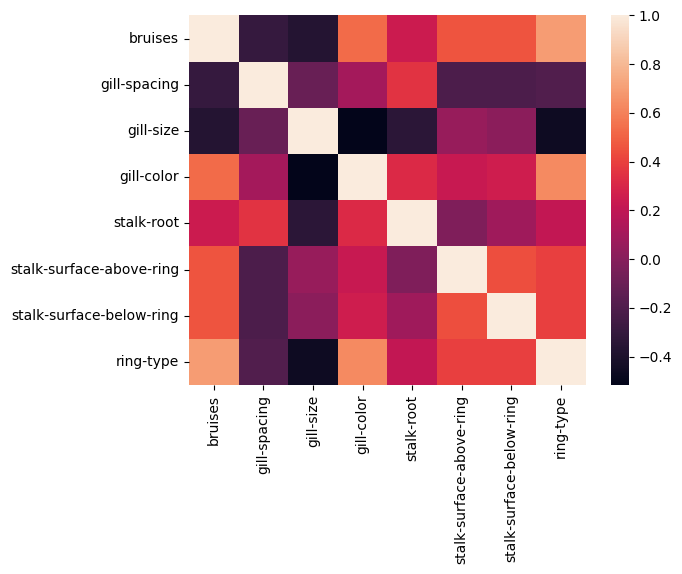

In [46]:
corr = X.corr()
sns.heatmap(corr)

# notebook feladatok:
- random forestet beilleszteni a minta alapjan
- knn megnezni????
- kiertekelni a modelleket
- mi a fasz az az auc roc curve?

# webapp elkezdeni
- video alapjan ha van
- talalt githubos szar alapjan